<a href="https://colab.research.google.com/github/misabella4/DS2002/blob/main/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [25]:
import sqlite3

connection = sqlite3.connect('superhero_db.sqlite')
print("Database created / connected")

cursor = connection.cursor()
print("Cursor created")

cursor.execute('DROP TABLE IF EXISTS Battles;')
cursor.execute('DROP TABLE IF EXISTS Heroes;')
cursor.execute('DROP TABLE IF EXISTS Villains;')
print("Tables dropped (if they existed)")

cursor.execute('''
CREATE TABLE IF NOT EXISTS Heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
)
''')
print("Heroes table created")

cursor.execute('''
CREATE TABLE IF NOT EXISTS Villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
)
''')
print("Villains table created")

cursor.execute('''
CREATE TABLE IF NOT EXISTS Battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER NOT NULL,
    villain_id INTEGER NOT NULL,
    outcome TEXT NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES Heroes(id)
    FOREIGN KEY (villain_id) REFERENCES Villains(id)
)
''')
print("Battles table created")

Database created / connected
Cursor created
Tables dropped (if they existed)
Heroes table created
Villains table created
Battles table created


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [26]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('superhero_db.sqlite')
cursor = connection.cursor()

df_heroes = pd.read_csv('heroes.csv')
df_villains = pd.read_csv('villains.csv')
df_battles = pd.read_csv('battles.csv')

df_heroes.to_sql('Heroes', connection, if_exists='append', index=False)
df_villains.to_sql('Villains', connection, if_exists='append', index=False)
df_battles.to_sql('Battles', connection, if_exists='append', index=False)
print("Data successfully inserted into SQL tables")

heroes_df = pd.read_sql_query('SELECT * FROM Heroes', connection)
print(heroes_df.head())

villains_df = pd.read_sql_query('SELECT * FROM Villains', connection)
print(villains_df.head())

battles_df = pd.read_sql_query('SELECT * FROM Battles', connection)
print(battles_df.head())

Data successfully inserted into SQL tables
   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [27]:
# Query 1 - Retrieve all superheroes and their powers
cursor.execute("SELECT name, power FROM heroes")
rows = cursor.fetchall()

print("All superheroes and their powers:")
for row in rows:
    print(row)

# Query 2 - Find all battles where the hero won
cursor.execute('''
    SELECT * FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    WHERE battles.outcome = "Hero Wins"
''')
winner = cursor.fetchall()

print("\nAll battles where hero won:")
for row in winner:
    print(row)

# Query 3 - List all villains and their evil plans
cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()

print("\nAll villains and their evil plans:")
for row in rows:
    print(row)

# Query to determine which superhero has fought the most battles
cursor.execute('''
    SELECT name, COUNT(Battles.id) AS count FROM Heroes
    JOIN Battles ON Heroes.id = Battles.hero_id
    GROUP BY Heroes.id
    ORDER BY count DESC;
''')
all_battles = cursor.fetchall()

most_battles = all_battles[0]
print(f"\nSuperhero with the most battles: {most_battles[0]}")

All superheroes and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')

All battles where hero won:
(2, 9, 3, 'Hero Wins', 9, 'Hulk', 'Super Strength', 'Avengers')
(5, 1, 7, 'Hero Wins', 1, 'Spider-Man', 'Web-slinging', 'Avengers')
(7, 9, 8, 'Hero Wins', 9, 'Hulk', 'Super Strength', 'Avengers')
(8, 3, 2, 'Hero Wins', 3, 'Batman', 'Genius Detective', 'Justice League')
(9, 7, 5, 'Hero Wins', 7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(13, 8, 9, 'Hero Wins', 8, 'The Flash', 'Super Speed', 'Justice League')
(20, 3, 4, 'Hero Wins', 3, 'Batman', 'Genius Detective', 'Justice League')
(29, 3, 5, 'Hero Wins', 3, 'Batman', 'Genius Detective', 'Justice League')
(30, 5, 5, 'Hero Wins', 5, 'Thor', 'God of Thunder',

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [32]:
import sqlite3

connection = sqlite3.connect('superhero_db.sqlite')
print("Database created / connected")

cursor = connection.cursor()

cursor.execute('DROP TABLE IF EXISTS Sidekicks;')
cursor.execute('''
CREATE TABLE IF NOT EXISTS Sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    hero_id INTEGER NOT NULL,
    power TEXT NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES Heroes(id)
)
''')
print("Sidekicks table created")

sidekicks_data = [
    ("Ned", 1, "Sorcery"),
    ("J.A.R.V.I.S.", 2, "Artificial Intelligence"),
    ("Robin", 3, "Physical Strength"),
    ("Boy Thunder", 4, "Energy"),
    ("Thori the Dog", 5, "Hellfire"),
    ("Donna Troy", 6, "Voice Manipulation"),
    ("Okoye", 7, "Martial Arts"),
    ("Kid Flash", 8, "Speed and Telepathy"),
    ("Titan", 9, "Absorbing Energy"),
    ("Wong", 10, "Martial Arts and Sorcery")
]
print("Sidekicks data created")

cursor.executemany('''
INSERT INTO Sidekicks (name, hero_id, power) VALUES (?, ?, ?)
''', sidekicks_data)
print("Sidekicks data inserted")

connection.commit()

# Query - Retrieve all sidekicks and their powers
cursor.execute("SELECT name, power FROM Sidekicks")
rows = cursor.fetchall()

print("All sidekicks and their powers:")
for row in rows:
    print(row)

connection.close()

Database created / connected
Sidekicks table created
Sidekicks data created
Sidekicks data inserted
All sidekicks and their powers:
('Ned', 'Sorcery')
('J.A.R.V.I.S.', 'Artificial Intelligence')
('Robin', 'Physical Strength')
('Boy Thunder', 'Energy')
('Thori the Dog', 'Hellfire')
('Donna Troy', 'Voice Manipulation')
('Okoye', 'Martial Arts')
('Kid Flash', 'Speed and Telepathy')
('Titan', 'Absorbing Energy')
('Wong', 'Martial Arts and Sorcery')


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

Database connected


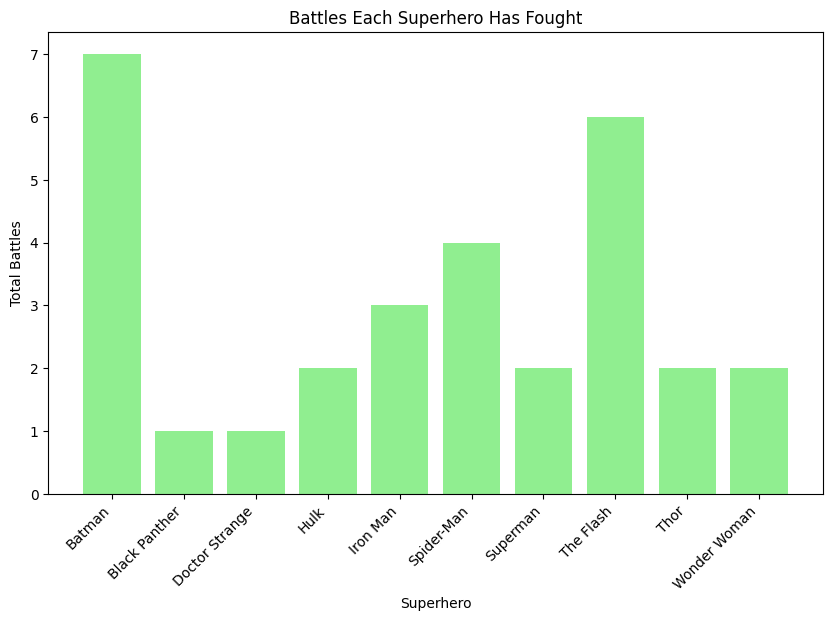

In [40]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

connection = sqlite3.connect('superhero_db.sqlite')
print("Database connected")

cursor = connection.cursor()

cursor.execute('''
SELECT Heroes.name, COUNT(Battles.hero_id) AS total_battles FROM Battles
JOIN Heroes ON Battles.hero_id = Heroes.id
GROUP BY Heroes.name
''')
battles_data = cursor.fetchall()

df = pd.DataFrame(battles_data, columns=["Hero", "Number of Battles"])
df.head()

plt.figure(figsize=(10,6))
plt.bar(df['Hero'], df['Number of Battles'], color='lightgreen')
plt.xlabel('Superhero')
plt.ylabel('Total Battles')
plt.title('Battles Each Superhero Has Fought')
plt.xticks(rotation=45, ha='right')  # Used AI to figure out how to restructure x-axis labels
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!